             Budget         Year
count  5.620000e+02   562.000000
mean   1.083262e+10  1996.870107
std    1.813250e+10    12.176913
min    3.130000e+08  1976.000000
25%    9.605000e+08  1986.000000
50%    2.155000e+09  1997.000000
75%    1.235450e+10  2007.000000
max    9.432500e+10  2017.000000
  department        Budget  Year
1        DOC  8.190000e+08  1976
2        DOD  3.569600e+10  1976
3        DOE  1.088200e+10  1976
4        DOT  1.142000e+09  1976
5        EPA  9.680000e+08  1976


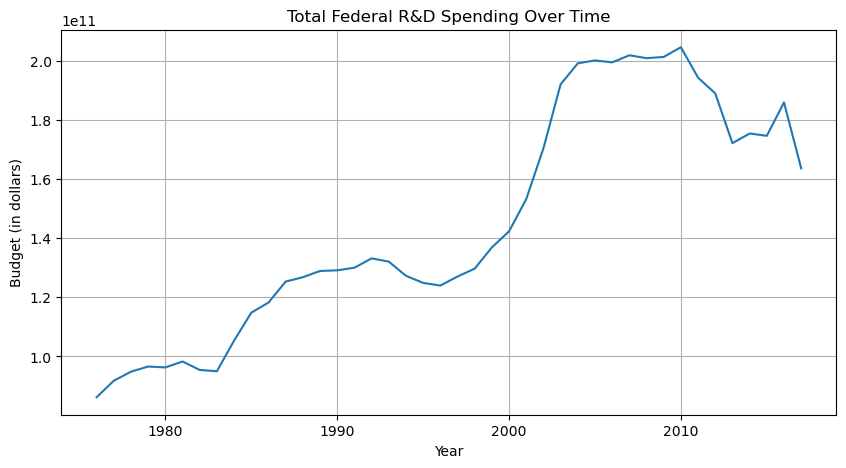

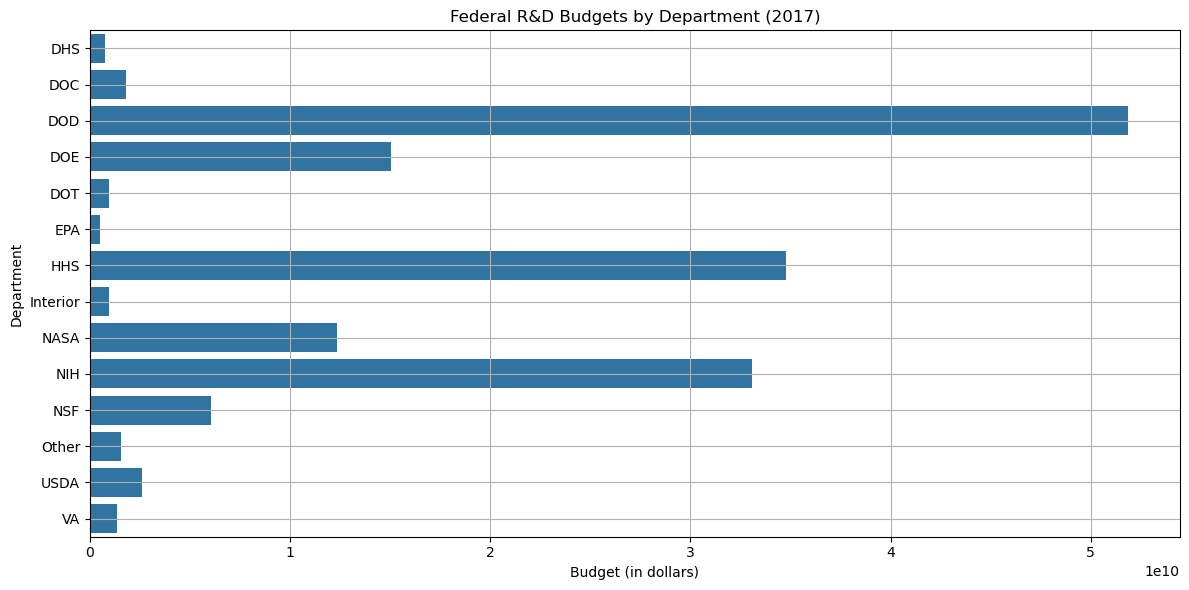

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path): # Loads the dataset from a CSV file
    try: #attempts to read the CSV file into a Pandas DataFrame
        return pd.read_csv(file_path) 
    except FileNotFoundError: # Handles where the file is not found and notifies the user
        print(f"Error: File not found at {file_path}")
        return None

def transform_data(df): # Transforms the dataset for analysis 
    df_melted = df.melt(id_vars=["department"], var_name="Year_GDP", value_name="Budget")
    df_melted["Year"] = df_melted["Year_GDP"].str.extract(r'(\d{4})').astype(int)
    df_melted.drop(columns=["Year_GDP"], inplace=True)
    df_melted.dropna(inplace=True)
    df_melted["Budget"] = pd.to_numeric(df_melted["Budget"], errors='coerce')
    return df_melted

def plot_trends(df_melted): # Plots the trends in R&D spending over time
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_melted.groupby("Year")["Budget"].sum().reset_index(), x="Year", y="Budget")
    plt.title("Total Federal R&D Spending Over Time")
    plt.xlabel("Year")
    plt.ylabel("Budget (in dollars)")
    plt.grid(True)
    plt.show()

def plot_department_comparison(df_melted): # Plots a comparison of R&D budgets by department for the most recent year
    latest_year = df_melted["Year"].max()
    latest_data = df_melted[df_melted["Year"] == latest_year]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=latest_data, x="Budget", y="department", orient="h")
    plt.title(f"Federal R&D Budgets by Department ({latest_year})")
    plt.xlabel("Budget (in dollars)")
    plt.ylabel("Department")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main script
file_path = "fed_rd_year&gdp.csv" # Defines file path to dataset
df = load_data(file_path)
if df is not None: # Proceeds ONLY if the dataset was successfully loaded
    df_melted = transform_data(df)
    print(df_melted.describe()) # Prints a summary of the transformed data
    print(df_melted.head()) # Prints the first few rows of the transformed data
    plot_trends(df_melted)
    plot_department_comparison(df_melted)

# In this notebook, I clean, transform, and manipulate a Federal R&D Spending dataset according to tidy data principles. I do this by reshaping the dataset to have each variable in its own column, ensuring each observation is in its own row, performing basic exploratory data analysis (EDA) using plots, and using aggregation functions to summarize the data.

# Step 1. Importing the Libraries 
Pandas is used for data cleaning and transformation and Matplotlib and Seaborn are used for vosualization purpouses. 

# Step 2 Loading the Dataset
The coding for this step is important because it reads the dataset into a Pandas DataFrame while handing file errors. 

# Step 3. Data Cleaning and Transformation 
Becuase I was noticed issues such as wide formated data with years as columns instead of rows, department names in one column but budget values spread across multiple colums, and unspecififc column names, I used the "melt()" function to reshapes wide format data into long format, which follows the tidy data principles.
In addition to this, I utalized the "str.split()" function for the "Year_GDP" column to ensure each variable has its own column. 
Lastly, I cleaned the numeric values which is important for extracting only the numeric year values, converting budget values into numerical form, and removes missing values. 

# Step 4. Explatory Data Analysis (EDA)
For this step, I utilized the ".describe()" function to provide summary statstics such as mean, min, max, and mode. This steps helps to identify outliers, any missing values, and data distributions, which can be critical for detecting unexpected values within the dataset. 
In addition to this, I used the ".unique()" function to ensure that all department names were clean. This step ensures that department names are consistent and clean, which is important for accurate data grouping and analysis. 
Combined, these steps help validate the data and provide insights that guide proper data cleaning and modeling. 

# Step 5. Data Visualization 
The "Total Federal R&D Spending Over Time" line graph depicts the changes in speding over time. This graph is useful for identifying trends, patterns, and fluctuations in funding over multiple decades.

The "Federal R&D Budgets by Department (2017)" bar graph compares department specific R&D spending. This graph featuring horizontal bars make it easier to compare categories with longer labels, such as department names, while showing relative spending across various sectors.

# Step 6. Pivot Table: Aggregation
The "pivot_table" function properly displays the change in budgets per department over time. This step is important because it provides structured insights into R&D spending patterns across different departments over time. 